# Section1 Project - AI_05_김민주_Section1
# "다음 분기에 어떤 게임을 설계해야 할까?"
# 1. EDA, 데이터 전처리하기

## 1. 데이터 불러오기

In [ ]:
# 파일 직접 업로드
from google.colab import files
myfile = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
# 필요한 라이브러리 import
import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [ ]:
# csv 파일 불러오기
df = pd.read_csv(io.BytesIO(myfile['vgames2.csv']))
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 2. EDA, 데이터 전처리하기

In [ ]:
# 1. Unnamed:0 칼럼 없애기
df = df.drop('Unnamed: 0', axis = 1)
df.head() 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 2. Sales(출고량)칼럼들에 있는 K, M을 정리
# 단위를 Million으로 맞추기로 함

# M을 삭제하기
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')

In [ ]:
# K를 없애고 그 값에 *0.001을 하여 단위를 백만으로 맞추기
df['NA_Sales'] = df['NA_Sales'].replace({'K':'*1e-3'}, regex = True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({'K':'*1e-3'}, regex = True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({'K':'*1e-3'}, regex = True).map(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace({'K':'*1e-3'}, regex = True).map(pd.eval)

In [ ]:
# 3. 칼럼별 Null 값을 확인하고 없애준다.
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# 4. Year 칼럼에 있는 한 자리, 두 자리 숫자를 정리
# Year을 Integer로 바꾸기
df['Year'] = df['Year'].astype(int)

In [ ]:
# 0~21까지의 수 앞에는 2000을 더하고, 23~99까지의 수 앞에는 1900을 더함
def fix(number):
  range1 = range(0,22)
  range2 = range(23,100)

  if number in range1:
    return number + 2000

  elif number in range2:
    return number + 1900
  
  else:
    return number

df['Year'] = df['Year'].apply(fix)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 5. 중복된 값 제거하기
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# 6. 마지막 칼럼에 Total_Sales 라는 지역별 Sales의 합인 칼럼을 생성 -> 본론에서 분석하기 위함
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 2. 데이터 분석

## (1) "지역에 따라서 선호하는 게임의 장르가 다를까?"

In [ ]:
# 1. 장르 칼럼과 지역별 출고량 칼럼들을 각각 groupby
df_na = df.groupby('Genre')['NA_Sales'].mean()
df_eu = df.groupby('Genre')['EU_Sales'].mean()
df_jp = df.groupby('Genre')['JP_Sales'].mean()
df_other = df.groupby('Genre')['Other_Sales'].mean()

df_na

Genre
Action          0.265046
Adventure       0.080276
Fighting        0.263892
Misc            0.234819
Platform        0.510172
Puzzle          0.214806
Racing          0.290976
Role-Playing    0.217584
Shooter         0.448812
Simulation      0.214456
Sports          0.290239
Strategy        0.101390
Name: NA_Sales, dtype: float64

Text(0.5, 1.0, 'Other')

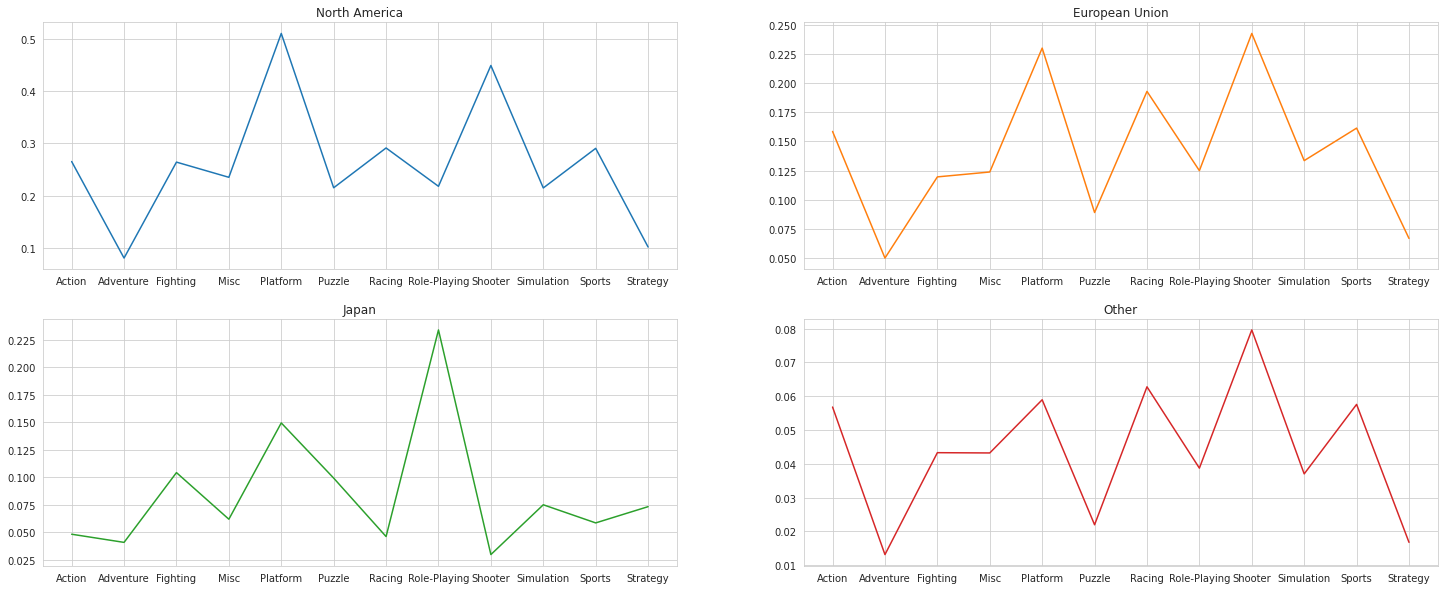

In [ ]:
# 2. goupby 한 데이터를 시각화 한다.

# 캔버스 사이즈 
plt.rcParams['figure.figsize'] = (25, 10)

# 차트 배경
sns.set_style('whitegrid')

# 차트 제목, 색깔, 한 화면에 4개  
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df_na)
axs[0,0].set_title('North America')
axs[0,1].plot(df_eu, 'tab:orange')
axs[0,1].set_title('European Union')
axs[1,0].plot(df_jp, 'tab:green')
axs[1,0].set_title('Japan')
axs[1,1].plot(df_other, 'tab:red')
axs[1,1].set_title('Other')

### 위의 그래프들을 통해서 지역에 따라서 선호하는 게임의 장르가 다르다는 것을 알 수 있습니다.
##### NA(North America) : Platform, Shooter
##### EU(European Union) : Shooter, Platform
##### JP(Japan) : Role-playing, Platform
##### Other : Shooter

### 🌟 즉, 지역별로 선호하는 장르는 분명히 존재합니다. 북미와 유럽은 동일하게 Platform과 Shooter 장르를 가장 선호합니다. 일본에서는 유일하게 독보적으로 Role-Playing 장르를 가장 선호합니다. 마지막으로 기타 지역에서는 Shooter 장르가 선호됨을 알 수 있습니다. 

### ❓ 그렇다면 이렇게 일본과 나머지 지역이 서로 선호하는 장르가 차이가 있을 때, 우리의 가장 큰 질문인 "다음 분기에 어떤 게임을 설계해야 할까?"란 질문을 **각 4개의 지역별로 전략을 짜야할지 아니면 특정 지역을 정해서 전략을 짜는게 좋을지** 선택해야 합니다.
### 💡 상관계수를 통해 알아볼 수 있습니다.

### 과연 각각의 나라들이 같은 중요도를 갖고 있을까?
### 이를 알기위해 먼저, 데이터 간의 상관관계를 분석합니다.

In [ ]:
# 3. 상관계수로 알아보는 각각 나라들의 중요도
# 데이터 상관계수 계산하기
df.corr

<bound method DataFrame.corr of                                                  Name  ... Total_Sales
0                        Candace Kane's Candy Factory  ...        0.04
1                                      The Munchables  ...        0.18
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...        0.02
3                    Deal or No Deal: Special Edition  ...        0.04
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.25
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.20
16594                     Rainbow Islands: Revolution  ...        0.01
16595                                        NBA 2K16  ...        0.79
16596                     Toukiden: The Age of Demons  ...        0.38
16597                        The King of Fighters '95  ...        0.17

[16241 rows x 10 columns]>

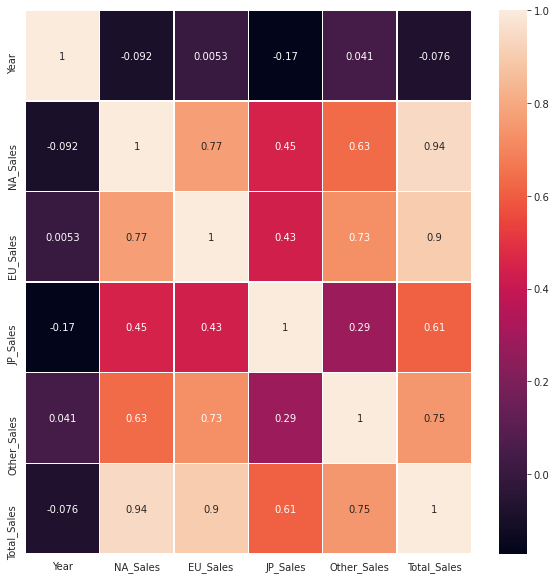

In [ ]:
# 상관계수 데이터로 heatmap 생성
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2g',ax=ax)
plt.show()

위의 상관 관계도를 보면 다음과 같은 것을 알 수 있습니다. 먼저, 지역출고량 데이터(NA, EU, JP, Other)와 총 매출(Total_Sales) 데이터 사이에는 양의 상관관계(positive correlation)가 있습니다. 지역 출고량 데이터가 증가하면 총 매출도 증가하기 때문입니다. 그리고 Total Sales와 미국은 0.94의 상관 관계를 가지고 있고 Total Sales와 유럽은 0.9의 상관 관계를 가지고 있습니다. 반면 Total Sales와 일본의 상관 관계는 0.61입니다. 이는 Total Sales가 일본 판매의 영향을 가장 적게 받는 반면 미국과 유럽 판매의 영향을 가장 많이 받는다는 것을 의미합니다.
### 🌟 즉, 앞으로의 분석에 일본 데이터보단 미국과 유럽의 데이터가 총 출고량에 더 큰 영향을 줍니다. 다시 말해, 다음 분기에 설계할 게임은 미국과 유럽의 데이터 분석 결과를 따르는 것이 전 세계 총 매출에 더 큰 영향을 줄 수 있습니다.
### 🌟 (1) 결과 : 
### 1. 지역에 따라서 선호하는 게임의 장르가 다릅니다.
### 2. 연도별 장르 그래프를 통해 'Action'과 'Shooter'장르가 최신 트렌드임을 알 수 있습니다.
### 3. 일본보다 미국과 유럽의 판매량이 총 매출에 더 큰 영향을 줍니다. -> 다음 분기 타겟 지역 : 미국과 유럽

## (2) "연도별 게임의 트렌드가 있을까?"

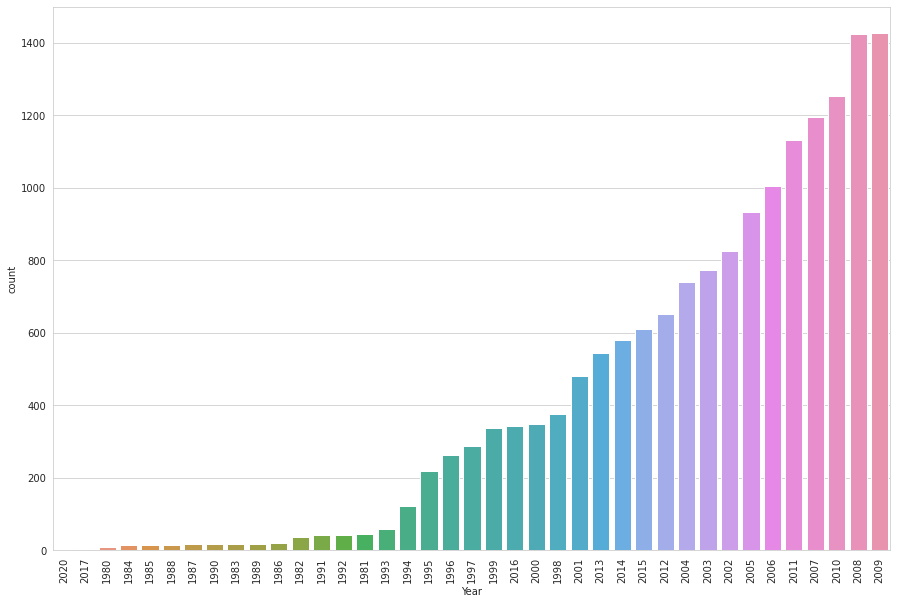

In [ ]:
# 1. 먼저 연도별로 몇 개의 게임들이 출시되었는지 비교
# 막대그래프로 시각화
plt.figure(figsize = (15,10))
sns.countplot(x = 'Year',
              data = df,
              order = df.groupby(by = ['Year'])['Name'].count().sort_values(ascending = True).index);
plt.xticks(rotation = 90);

🌟 2006 ~ 2010년까지 게임이 많이 출시되었고 **그 중에서도 2009년과 2008년이 가장 많은 게임이 출시되었습니다.** 또한 2020년이 될 수록, 그러니까 2010년 이후 최근까지의 게임 출시 수는 많이 줄어들었습니다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


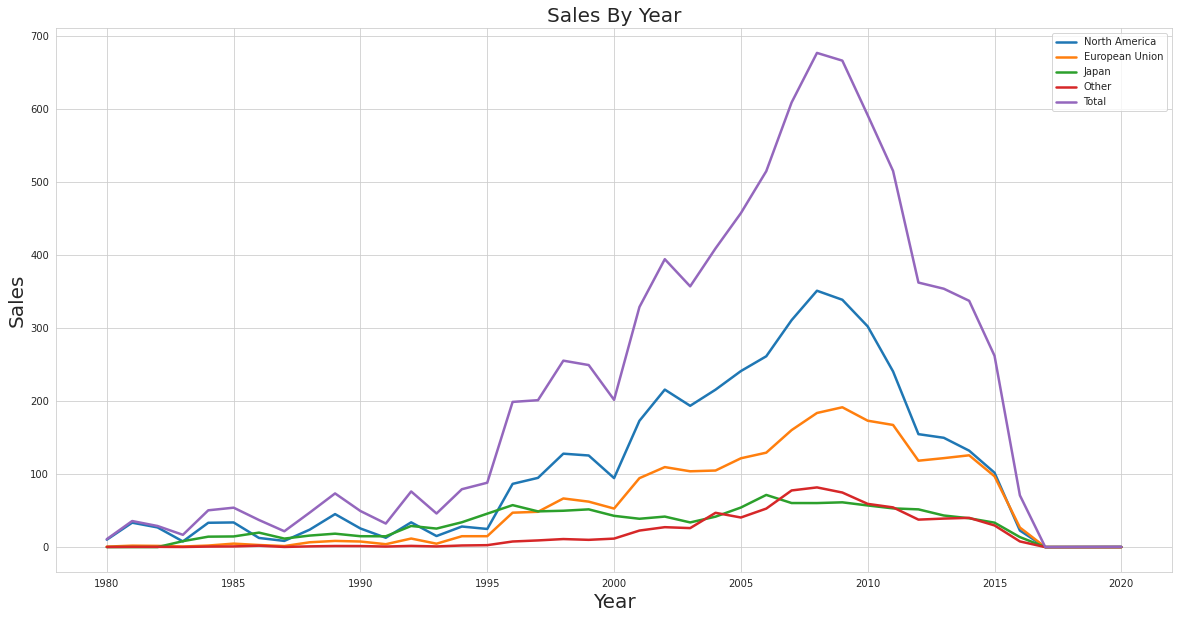

In [ ]:
# 2. 연도별 지역별 게임 판매량(출고량)
# 각 지역별 출고량을 연도로 groupby
sales_year = df.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum().reset_index()
sales_year = sales_year[sales_year.Year <2022];
sales_year = sales_year.rename(index = str, 
                               columns = {'NA_Sales':'North America', 
                                          'EU_Sales':'European Union', 
                                          'JP_Sales':'Japan', 
                                          'Other_Sales':'Other',
                                          'Total_Sales' : 'Total'});
# 선그래프로 시각화
sales_year.set_index('Year')[['North America', 'European Union', 'Japan', 'Other', 'Total']].plot(figsize = (20,10), linewidth = 2.5);
plt.title("Sales By Year", fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Sales',fontsize = 20)
plt.legend;
plt.show();

연도별 지역별 판매량을 보면 2005년부터 2010년 사이가 지역 전반으로 비디오 게임 판매량이 가장 많은 것을 알 수 있습니다. 이는 앞서 본 게임 출시 그래프와 연관됩니다. 특히 2008, 2009년에 많은 게임이 출시된 것과 연관되어 동시에 많은 게임들이 판매되었다는 사실을 보여줍니다.

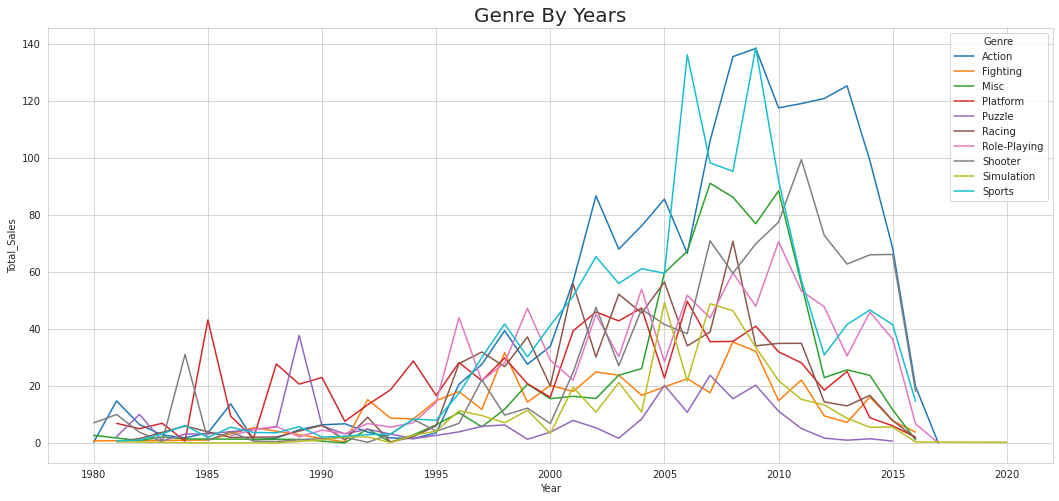

In [ ]:
# 3. 연도별로 어떤 장르가 팔렸는지
# 가장 많이 팔린 장르 10개를 통해 그 변화를 그래프로 나타냄

# 총 판매량을 장르로 groupby 해준 후 가장 많이 팔린 10개의 장르를 추림
top_genre = df.groupby(['Genre'])['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending = False).head(10)['Genre'].tolist()

# 가장 많이 팔린 10개의 장르로 데이터프레임 생성
genre_year = df[df['Genre'].isin(top_genre)].groupby(['Genre', 'Year'])['Total_Sales'].sum().reset_index()

# 이를 선그래프로 시각화
plt.figure(figsize = (18,8))
sns.lineplot(data = genre_year, x = 'Year', y = 'Total_Sales', hue = 'Genre')
plt.title('Genre By Years', fontsize = 20)
plt.show();

위의 그래프로 대략적인 흐름을 알 수 있습니다. 하지만 가장 최근의 트렌드를 알기에는 그래프가 복잡합니다. 따라서 10년을 단위로해서 각 연도별로의 데이터를 시각화해보겠습니다.

In [ ]:
# 4. 10년 단위로 연도별 데이터 시각화
#10년 단위 칼럼 만들기
df['Decade'] = ((np.floor(df['Year'] / 10)*10).astype(int))
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Decade
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010


In [ ]:
# 장르와 10년 단위를 그룹화
df_group = (df.groupby(['Genre','Decade']).Total_Sales.sum().reset_index())

# 장르별 글로별 매출 비율(%)이 포함된 칼럼을 추가
df_group['Decade_Total_Sales'] = df_group.groupby('Decade').Total_Sales.transform('sum')
df_group['Total_Sales(%)'] = (df_group['Total_Sales']/df_group['Decade_Total_Sales']).mul(100).round(2)
df_group.head()

,Genre,Decade,Total_Sales,Decade_Total_Sales,Total_Sales(%)
0,Action,1980,51.10,375.98,13.59
1,Action,1990,139.15,1275.19,10.91
2,Action,2000,853.13,4612.42,18.50
3,Action,2010,669.60,2491.49,26.88
4,Adventure,1980,4.78,375.98,1.27


In [ ]:
# 각 세대별 가장 인기있는 장르 3개씩 추림
popular_genre = set()
for i in [1980, 1990, 2000, 2010]:
  a, b, c = df_group[df_group['Decade'] == i].sort_values('Total_Sales(%)', ascending = False)['Genre'].head(3)
  popular_genre.add(a)
  popular_genre.add(b)
  popular_genre.add(c)

popular_genre

{'Action',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Sports'}

[Text(0, 0.5, 'Sales(%)'),
 Text(0.5, 0, 'Decade'),
 Text(0.5, 1.0, 'Most Popular Genre By Decades')]

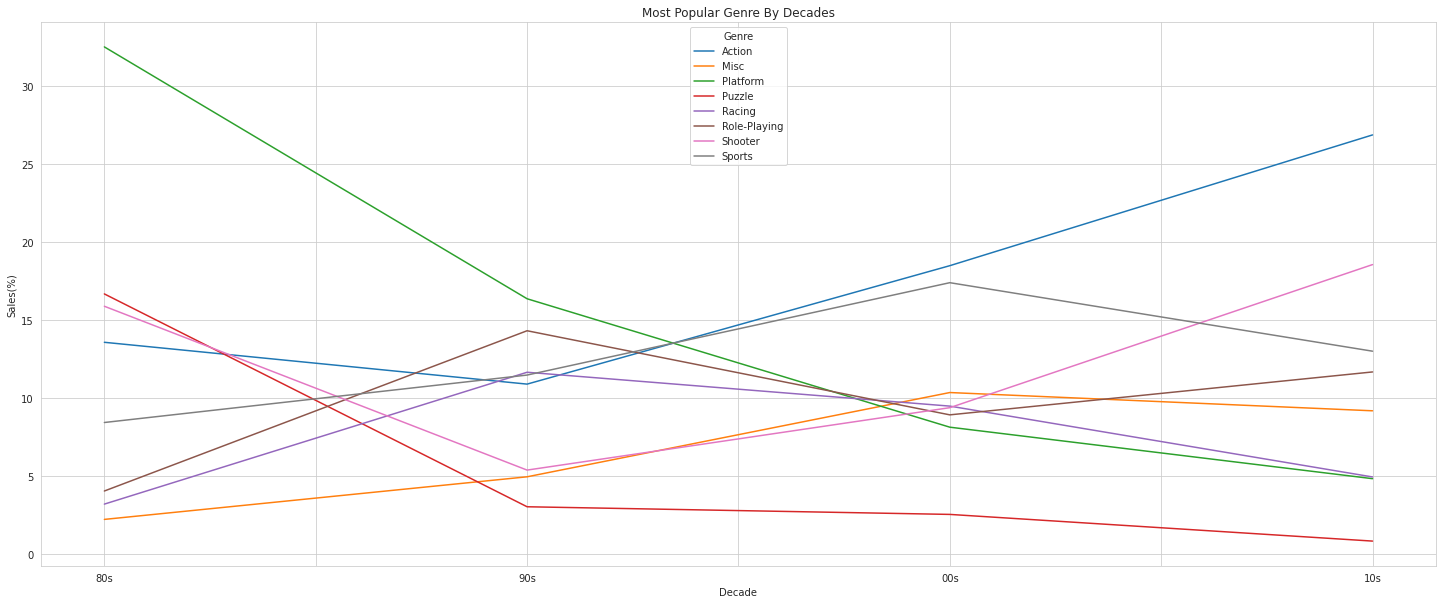

In [ ]:
# 인기 장르 목록으로 데이터 변환
df_pop = df_group[df_group['Genre'].isin(popular_genre)]

# 선그래프로 시각화
fig, ax = plt.subplots()
sns_plot = sns.lineplot(data = df_pop, x = 'Decade', y = 'Total_Sales(%)', hue = 'Genre')
ax.set_xticklabels(['', '80s', '', '90s', '', '00s', '', '10s'])
ax.set(xlabel = 'Decade', ylabel = 'Sales(%)', title = 'Most Popular Genre By Decades')

위 그래프를 통해 가장 최근에는 Action 과 Shooter 장르가 대세라는 것을 알 수 있습니다. 
#### 🌟 따라서 연도별 게임의 트렌드는 존재하고 그 트렌드는 Action 과 Shooter 장르입니다. 

### ❓ 그렇다면 연도별 지역별 장르 선호도는 어떨까?

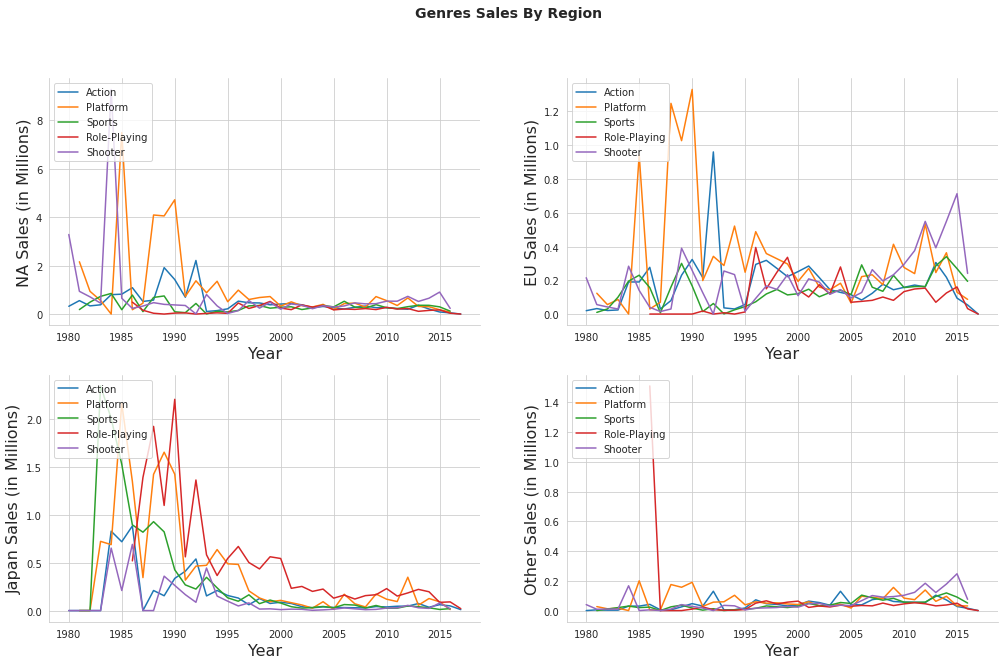

In [ ]:
# 5. 연도별로 지역별 장르 선호도
# 가장 많이 팔린 장르 상위 5개를 가지고 Total_Sales와 Groupby
genre_region = df.groupby(['Genre'])['Total_Sales'].sum().sort_values(ascending=False).head(5).index

# 4개의 그래프를 한 화면에 넣기
genre_region = df[df.Genre.isin(genre_region)]
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(17,10))

# 제목
fig.suptitle('Genres Sales By Region', fontsize=14, fontweight = 'bold')

# 그래프 시각화
sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=genre_region, ci=None, ax=ax0[0])
sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=genre_region, ci=None, ax=ax0[1])
sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=genre_region, ci=None, ax=ax1[0])
sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=genre_region, ci=None, ax=ax1[1])

# 각각 그래프에 각주 위치 설정
ax0[0].legend(loc='upper left')
ax0[1].legend(loc='upper left')
ax1[0].legend(loc='upper left')
ax1[1].legend(loc='upper left')

# y축 라벨
ax0[0].set_ylabel('NA Sales (in Millions)', fontsize=16)
ax0[1].set_ylabel('EU Sales (in Millions)', fontsize=16)
ax1[0].set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax1[1].set_ylabel('Other Sales (in Millions)', fontsize=16)

# x축 라벨
ax0[0].set_xlabel('Year', fontsize=16)
ax0[1].set_xlabel('Year', fontsize=16)
ax1[0].set_xlabel('Year', fontsize=16)
ax1[1].set_xlabel('Year', fontsize=16)

# 그래프 테두리를 제거
sns.despine()

plt.show()


### 🌟 위의 그래프를 통해 일본지역('Role-Playing)을 제외하고, 
### 북미와 유럽 그리고 기타지역의 가장 최신 트렌드는 **'Shooter' 장르**임을 알 수 있습니다.
### 또한 연도별 트렌드였던 Action 과 Shooter를 봤을 때 결론적으로 다음 분기 게임은 Shooter 장르로 해야함을 알 수 있습니다. 

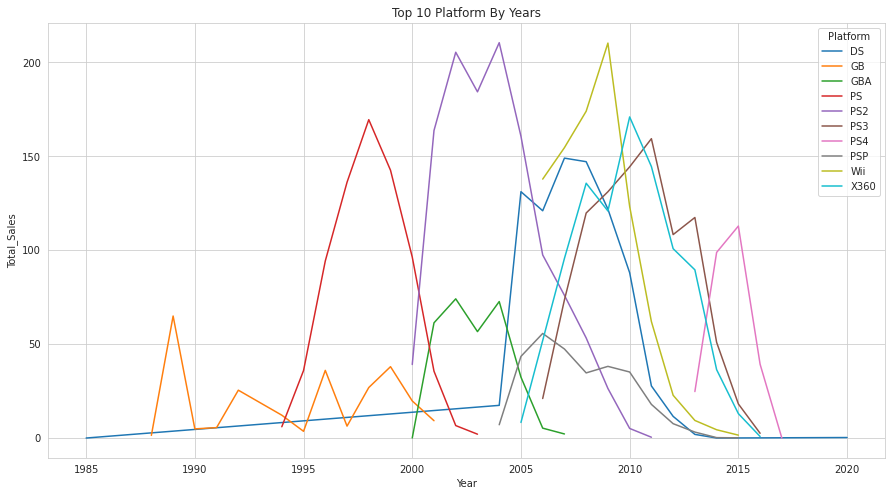

In [ ]:
# 6. 연도별로 어떤 플랫폼이 많이 사용되었는지
# 가장 많이 사용된 10개의 플랫폼을 판매량에 따라 연도별로 보자
top_platform = df.groupby(['Platform'])['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending = False).head(10)['Platform'].tolist()

# 이것으로 데이터프레임 생성
platform_year = df[df['Platform'].isin(top_platform)].groupby(['Platform','Year'])['Total_Sales'].sum().reset_index()

# 선그래프로 시각화
plt.figure(figsize = (15,8))
sns.lineplot(data = platform_year, x = 'Year', y ='Total_Sales', hue ='Platform')
plt.title('Top 10 Platform By Years')
plt.show();

### 🌟 즉, 위 그래프를 통해 가장 최근에 많이 사용된 플랫폼은 PS4임을 알 수 있습니다.

### 🌟 (2)결과 :
### 1. 연도별 최근 게임 장르 트렌드는 Action과 Shooter 장르이다.
###    지역별 최근 게임 장르 트렌드는 Shooter 장르이다.
###    -> 다음 분기 게임 장르 : Shooter

### 2. 가장 최근까지 많이 사용되었던 플랫폼은 PS4입니다.
### 3. 2009년 2008년에 가장 많은 게임이 출시되고 동시에 팔렸다.

## (3) 출고량이 높은 게임에 대한 시각화 프로세스


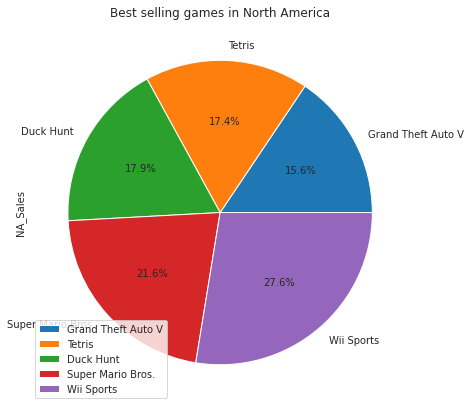

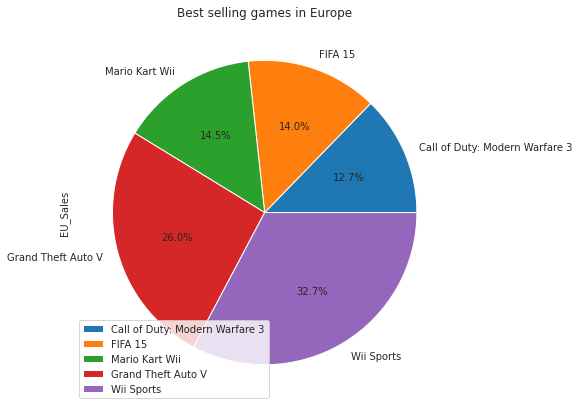

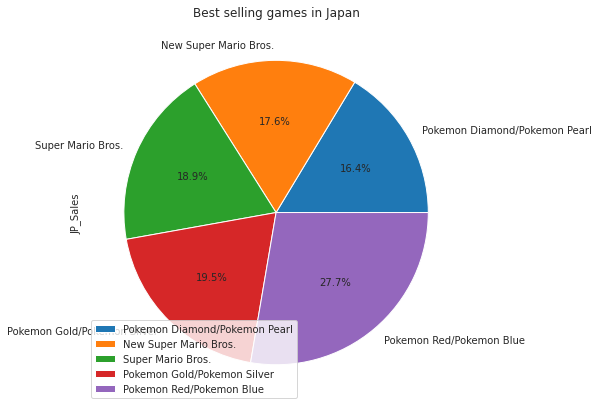

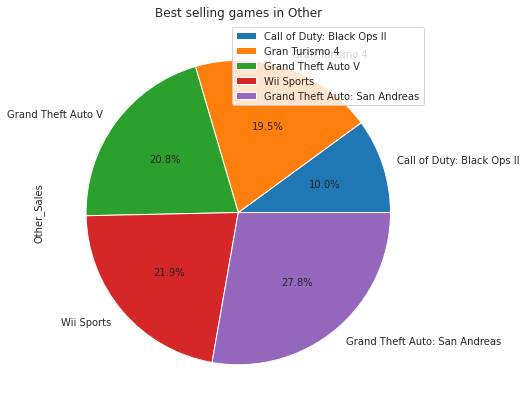

In [ ]:
# 1. 지역별 출고량이 가장 높은 게임 5개씩을 파이그래프로 시각화
# NA
df10 = pd.DataFrame(df.groupby('Name')['NA_Sales'].sum())
df10.sort_values(by=['NA_Sales'], inplace=True)
df10 = df10.tail(5)
df10.plot.pie(y='NA_Sales', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Best selling games in North America")

# EU
df10 = pd.DataFrame(df.groupby('Name')['EU_Sales'].sum())
df10.sort_values(by=['EU_Sales'], inplace=True)
df10 = df10.tail(5)
df10.plot.pie(y='EU_Sales', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Best selling games in Europe")

# JP
df10 = pd.DataFrame(df.groupby('Name')['JP_Sales'].sum())
df10.sort_values(by=['JP_Sales'], inplace=True)
df10 = df10.tail(5)
df10.plot.pie(y='JP_Sales', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Best selling games in Japan");

# Other
df10 = pd.DataFrame(df.groupby('Name')['Other_Sales'].sum())
df10.sort_values(by=['Other_Sales'], inplace=True)
df10 = df10.tail(5)
df10.plot.pie(y='Other_Sales', autopct='%1.1f%%', figsize=(7, 7))
plt.title("Best selling games in Other");

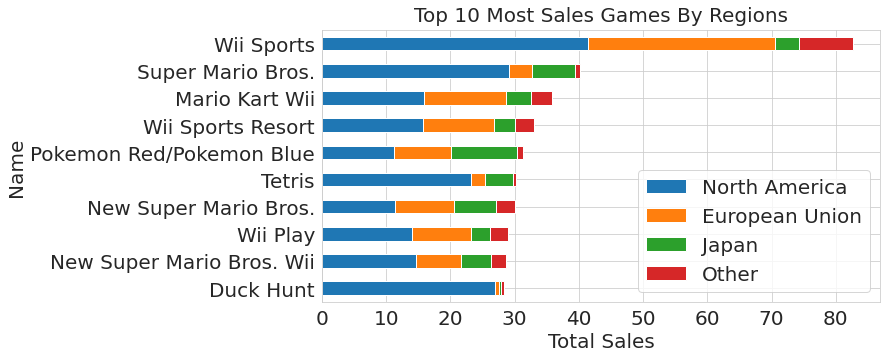

In [ ]:
# 2. 가장 많이 팔린 10가지 게임들이 지역별로 어떻게 판매되었는지 한 눈에 비교 
# 필요한 칼럼들의 이름을 바꿔서 새로운 데이터프레임 생성
df1 = df.rename(index = str, columns = {"NA_Sales" : "North America", 'EU_Sales':'European Union', 'JP_Sales':'Japan', 'Other_Sales':'Other'})
df1 = df1.loc[:, 'Name':'Total_Sales'].sort_values(by = 'Total_Sales', ascending = True).tail(10)

# 가로막대그래프로 시각화
sns.set_style('whitegrid')
ax = df1.set_index('Name')[['North America', 'European Union', 'Japan', 'Other']].plot(kind = 'barh', figsize = (10, 5), stacked = True)
plt.title("Top 10 Most Sales Games By Regions", fontsize = 20, y = 1.01)
plt.xlabel("Total Sales", fontsize = 20)
plt.ylabel('Name', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
ax = plt.gca()
plt.legend(fontsize = 20)

#### 🌟 (3) 결과 : 위 그래프들을 통해 다음과 같은 내용을 알 수 있습니다.
#### 1. 전반적으로 North America 시장이 가장 큰 시장임을 알 수 있습니다. 그 다음으로는 유럽, 일본, 기타 순입니다.
#### 2. 가장 인기있는 게임 10가지 중, 전 지역별로 가장 많이 팔린 게임은 Wii Sports입니다.
#### 3. 지역별로 가장 많이 팔렸던 게임은 : 
##### - North America : Wii Sports
##### - European Union : Wii Sports
##### - Japan : Pockemon Red/ Pocketmon Blue
##### - Other : Grand Theft Auto : San Andreas

## (4) 장르와 플랫폼간에는 서로 관계가 있을까?
#### 장르와 플랫폼간에 서로 관계가 있을지 분석하는 이유는, 지금까지의 분석을 통해 타겟 지역을 미국과 유럽으로, 장르는 슈터로 정했지만 플랫폼은 정하지 않았고 또한 장르와 플랫폼간에 서로 관계가 있다면 플랫폼을 정할 때 장르에 따라서 선택하는게 효과적이기 때문입니다.
#### 해당 내용을 카이제곱검정을 통해 알아보겠습니다.

##### 𝐻0(귀무가설) : 장르와 플랫폼은 서로 관련이 없다.
##### 𝐻1(대립가설) : 장르와 플랫폼은 서로 관련이 있다.

In [ ]:
# 1. 장르와 플랫폼간에 카이제곱 검정
# 먼저 장르와 플랫폼으로 이루어진 데이터프레임을 만든다.
df100 = pd.crosstab(df['Genre'], df['Platform'], margins=True).T
df100.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,9,0,115
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,180,36,14,53,28,19,10,84,6,28,25,15,498
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,335,237,36,388,89,235,66,196,42,279,146,78,2127


In [ ]:
# 위의 표를 통해 각장 많이 사용된 플랫폼 10개를 가지고 새로운 데이터프레임을 만든다.(All 값을 통해 알 수 있음)
top_platforms = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA']
df200 = df[df['Platform'].isin(top_platforms)]
df300 = pd.crosstab(df200['Genre'], df200['Platform'], margins=True).T
df300.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
DS,335,237,36,388,89,235,66,196,42,279,146,78,2127
GBA,162,35,23,86,139,39,64,72,40,18,88,18,784
PC,160,65,5,22,11,25,56,103,145,111,49,183,935
PS,153,66,108,76,64,32,143,96,96,60,221,70,1185
PS2,344,195,146,217,101,18,212,182,158,89,389,70,2121


In [ ]:
# observed values를 만든다
obs = np.array([])
np.set_printoptions(suppress=True)
for row in range(df300.shape[0]-1):
    obs = np.append(obs,df300.iloc[row][0:-1].values)

In [ ]:
# 기대값을 계산한다.
row_sum = df300.iloc[0:-1,-1].values
exp = []
for j in range(10):
    for col_sum in df300.iloc[-1,0:-1].values:
        exp.append(col_sum * row_sum[j] / df300.loc['All', 'All'])

In [ ]:
# 카이제곱을 계산한다.
chi = ((obs - exp)**2/exp).sum()

# 자유도를 계산한다.
dof = (df300.shape[0]-2)*(df300.shape[1]-2)

chi, dof

(3656.9930646451694, 99)

In [ ]:
# p값을 구한다
1 - stats.chi2.cdf(chi, dof)

0.0

따라서 p값은 0이 나왔습니다. 이 값은 일반적인 유의 수준인 0.05보다 확실히 낮습니다. 따라서 귀무가설을 기각하고 대립가설을 채택합니다.
#### 🌟 즉, 장르와 플랫폼은 서로 관련이 있습니다. 
#### 따라서 (2)번 분석에서 최근에 많이 사용된 플랫폼인 PS4를 다음 분기 게임의 플랫폼으로 하기에는 적절하지 않습니다. 왜냐하면 Shooter 장르를 PS4 플랫폼에서 만드는 것이 효과적인지 알 수 없기 때문입니다. 따라서 Shooter 장르에 알맞은 플랫폼을 찾을 필요가 있습니다. 

### 그렇다면 최신 트렌드인 'Shooter' 장르를 많이 만들어왔던 플랫폼은 어떤 것일까?


In [ ]:
# 2. 최신 트렌드인 'Shooter' 장르를 많이 만들어왔던 플랫폼
df300

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
Platform,,,,,,,,,,,,,
DS,335,237,36,388,89,235,66,196,42,279,146,78,2127
GBA,162,35,23,86,139,39,64,72,40,18,88,18,784
PC,160,65,5,22,11,25,56,103,145,111,49,183,935
PS,153,66,108,76,64,32,143,96,96,60,221,70,1185
PS2,344,195,146,217,101,18,212,182,158,89,389,70,2121
PS3,369,72,76,121,35,2,90,117,155,30,210,22,1299
PSP,216,213,73,104,35,43,65,190,37,29,130,58,1193
Wii,229,83,41,270,57,53,91,35,60,84,256,25,1284
X360,318,47,64,122,24,6,100,75,197,36,215,27,1231


### 위표를 통해 Shooter 장르가 가장 많이 만들어왔던 플랫폼은 **X360**임을 알 수 있습니다.

### 그렇다면 지역별로 많이 사용되었던 선호하는 플랫폼이 있을까?
### 있다면 X360 플랫폼에 대한 선호도는 어떨까?

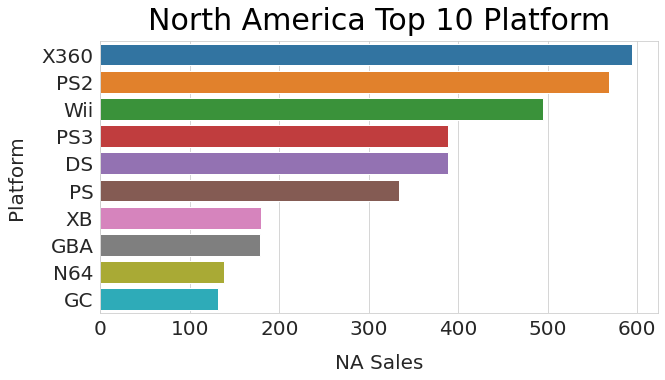

In [ ]:
# 3. 지역별로 선호하는 플랫폼을 비교

# NA
topsales1=df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y=topsales1["Platform"], x=topsales1["NA_Sales"], linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Platform", labelpad=15, fontsize=20)
plt.xlabel("NA Sales", labelpad=15, fontsize=20)
plt.title("North America Top 10 Platform", color='Black', fontsize=30, y=1.02)
ax = plt.gca()

plt.show();

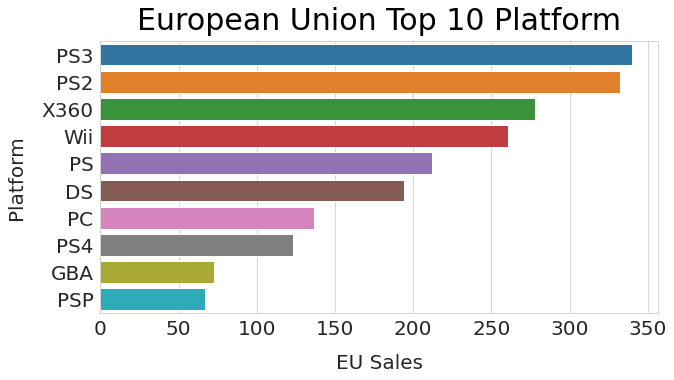

In [ ]:
# EU
topsales2 = df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y=topsales2['Platform'], x=topsales2["EU_Sales"], linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Platform', labelpad=15, fontsize=20)
plt.xlabel("EU Sales", labelpad=15, fontsize=20)
plt.title("European Union Top 10 Platform", color='Black', fontsize=30, y=1.02)
ax = plt.gca()

plt.show();

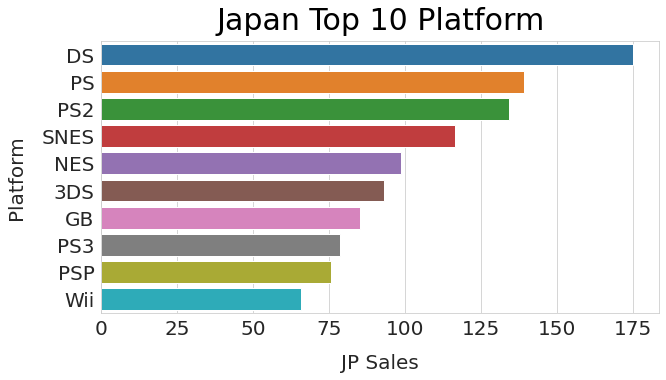

In [ ]:
# JP
topsales3 = df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y=topsales3['Platform'], x=topsales3["JP_Sales"], linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Platform', labelpad=15, fontsize=20)
plt.xlabel("JP Sales", labelpad=15, fontsize=20)
plt.title("Japan Top 10 Platform", color='Black', fontsize=30, y=1.02)
ax = plt.gca()

plt.show();

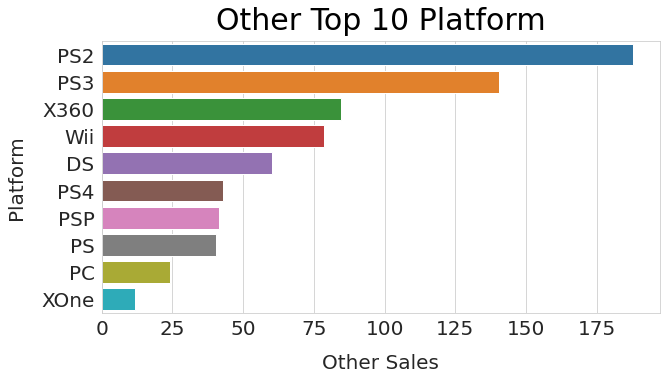

In [ ]:
# Other
topsales4 = df.groupby(['Platform'])['Other_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y=topsales4['Platform'], x=topsales4["Other_Sales"], linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Platform', labelpad=15, fontsize=20)
plt.xlabel("Other Sales", labelpad=15, fontsize=20)
plt.title("Other Top 10 Platform", color='Black', fontsize=30, y=1.02)
ax = plt.gca()

plt.show();

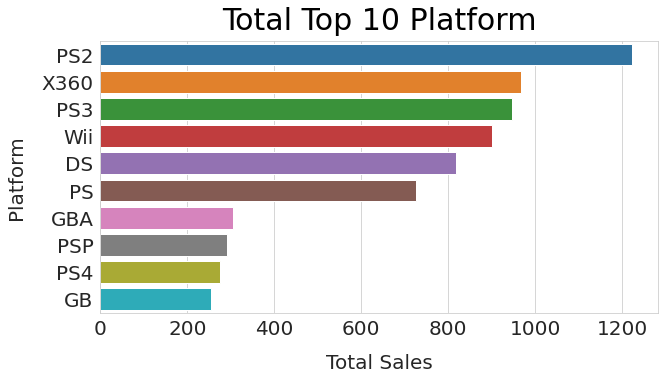

In [ ]:
# Total
topsales5 = df.groupby(['Platform'])['Total_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(y = topsales5['Platform'], x = topsales5["Total_Sales"], linewidth=1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Platform', labelpad=15, fontsize=20)
plt.xlabel("Total Sales", labelpad=15, fontsize=20)
plt.title("Total Top 10 Platform", color='Black', fontsize=30, y=1.02)
ax = plt.gca()

plt.show();

### 🌟(4) 결과 : 
1. 카이제곱 검정 결과 장르와 플랫폼은 서로 관련이 있습니다.
2. Shooter 장르를 많이 만든 경험이 있는 X360은 거의 모든 지역에서 Best3 안에 포함되었습니다 
##### North America : 1. X360 / 2.PS2 / 3. Wii
##### European Union : 1. PS3 / 2. PS2 / 3. X360
##### Japan : 1. DS / 2. PS / 3. PS2
##### Other : 1. PS2 / 2.PS3 / 3. X360
##### Total : 1. PS2 / 2. X360 / PS3
##### -> X360에 익숙하다 -> X360을 다음 분기 게임 플랫폼으로 했을 때 긍정적인 영향을 줄 것이다!
따라서 일본을 제외한 나머지 지역들은 X360 플랫폼을 많이 사용했다는 것을 알 수 있습니다. 주요 지역인 미국과 유럽은 해당 플랫폼에 익숙하다는 뜻이고 나아가 다음 분기 게임 설계에 X360을 사용했을 때 긍정적인 결과를 준다고 볼 수 있습니다.
### 3. 즉, 플랫폼은 Shooter 장르를 많이 만들어온 X360로 하는게 적절하다. -> 다음 분기 게임 플랫폼 : X360

# 3. 결론

### ✨Target : 미국과 유럽
### ✨Genre : Shooter
### ✨Platform : X360

###1. 왜 Target : 미국과 유럽?
데이터 분석 1번에서 우리는 각 지역별 선호하는 장르와 함께, 데이터간 상관관계를 구했습니다. 이를 통해 미국과 유럽 지역의 매출이 전 세계 총 매출에 가장 큰 영향을 끼치는 것을 알게되었습니다. 물론 일본이나 기타 지역만을 위한 전략을 각각 세우는 것도 하나의 방법일 것입니다. 하지만 우리에겐 제한된 시간과 비용이 있기 때문에 전략적으로 효과적인 미국과 유럽을 타겟으로 합니다.

### 2. 왜 Genre : Shooter?
데이터 분석 2번을 통해 지역별 그리고 연도별 게임 트렌드를 장르와 플랫폼을 통해 알아봤습니다. 이를 통해 연도별 게임 트렌드는 분명히 존재함을 확인했습니다. 특히 연도별 그리고 지역별로 공통적으로 최근 트렌드인 Shooter 장르는 "다음 분기 게임 설계"에 알맞습니다. 

###3. 왜 Platform : X360?
데이터 분석을 통해 Shooter가 최신 트렌드임을 확인했습니다. 2번 분석을 통해 최근에 많이 사용된 플랫폼은 PS4임을 알 수 있습니다. 하지만 4번 분석에서 카이제곱 검정을 통해 장르와 플랫폼간에는 연관성이 있다는 것을 검정했습니다. 따라서 Shooter 장르가 가장 많이 만들어졌던 X360 플랫폼은 다음 분기 게임 설계에 있어 적절합니다. 또한 일본지역을 제외하고 미국, 유럽, 기타 지역에서 많이 사용된 플랫폼 Best3 안에 해당 플랫폼이 포함되었습니다. 즉, 타겟지역인 미국과 유럽이 해당 플랫폼에 익숙하다는 것이고 이는 다음 분기 게임 플랫폼을 X360으로 했을 때 긍정적인 영향을 줄 것입니다.

# 🌟 결론 :
# 다음 분기에는 타겟을 미국과 유럽으로하고, 가장 최신 트렌드인 Shooter 장르인 게임을 X360 플랫폼을 사용해 설계해야 한다.